# Model for classifying customers with the possibility of non-payment - Cooperative XYZ

## Carga de datos

In [1]:
import pandas as pd
import numpy as np
from pandas_profiling import  ProfileReport
import seaborn as sns
from plotnine import *
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [2]:
path = "C:/Users/jhloaiza/Data Clientes Cooperativa.txt"
df = pd.read_csv(path,sep='\t')

In [3]:
df.head()

,ID,EDAD,INGRESOS,GENERO,ESTADO_CIVIL,NUM_HIJOS,NUM_TARJETAS,MODALIDAD_PAGO,HIPOTECA,PRESTAMOS,RIESGO
0,100756,44,59944,m,married,1,2,monthly,y,0,V
1,100668,35,59692,,married,1,1,monthly,y,0,F
2,100418,34,59508,m,married,1,1,monthly,y,1,V
3,100416,34,59463,m,married,0,2,monthly,y,1,F
4,100590,39,59393,f,married,0,2,monthly,y,0,V


In [4]:
df=df.set_index(['ID'])
df.shape

(4117, 10)

In [5]:
report = ProfileReport(df, title="Pandas Profiling Report")

In [6]:
report

## Analisis EDA 

In [7]:
df.describe(include ='all')

,EDAD,INGRESOS,GENERO,ESTADO_CIVIL,NUM_HIJOS,NUM_TARJETAS,MODALIDAD_PAGO,HIPOTECA,PRESTAMOS,RIESGO
count,4117.000000,4117.000000,4117,4117,4117.000000,4117.000000,4117,4117,4117.000000,4117
unique,NaN,NaN,3,3,NaN,NaN,2,2,NaN,2
top,NaN,NaN,f,married,NaN,NaN,weekly,y,NaN,F
freq,NaN,NaN,2077,2089,NaN,NaN,2091,3200,NaN,3313
mean,31.819529,25580.211805,NaN,NaN,1.452514,2.429439,NaN,NaN,1.375759,NaN
std,9.876729,8766.867219,NaN,NaN,1.170579,1.880721,NaN,NaN,0.838183,NaN
min,18.000000,15005.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,NaN
25%,23.000000,20497.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN
50%,31.000000,23490.000000,NaN,NaN,1.000000,2.000000,NaN,NaN,1.000000,NaN
75%,41.000000,27566.000000,NaN,NaN,2.000000,4.000000,NaN,NaN,2.000000,NaN


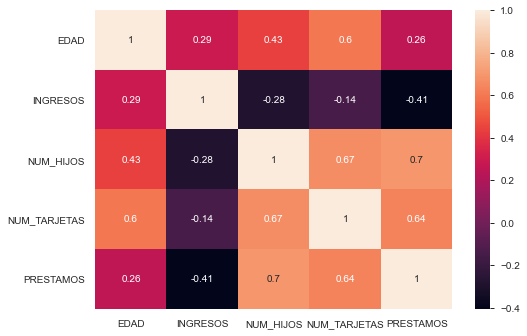

,EDAD,INGRESOS,NUM_HIJOS,NUM_TARJETAS,PRESTAMOS
EDAD,1.00,0.29,0.43,0.60,0.26
INGRESOS,0.29,1.00,-0.28,-0.14,-0.41
NUM_HIJOS,0.43,-0.28,1.00,0.67,0.70
NUM_TARJETAS,0.60,-0.14,0.67,1.00,0.64
PRESTAMOS,0.26,-0.41,0.70,0.64,1.00


In [8]:
#Matriz de correlaciones
corr = df[["EDAD","INGRESOS","NUM_HIJOS","NUM_TARJETAS",'PRESTAMOS']].corr()
sns.heatmap(corr, annot=True)
plt.show()

corr = df[["EDAD","INGRESOS","NUM_HIJOS","NUM_TARJETAS",'PRESTAMOS']].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

In [9]:
df_RV=  df.loc[df['RIESGO']=='V']
df_RF=  df.loc[df['RIESGO']=='F']

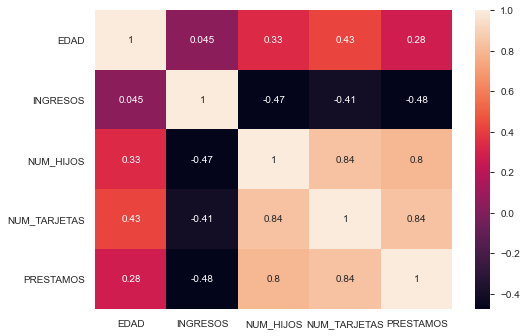

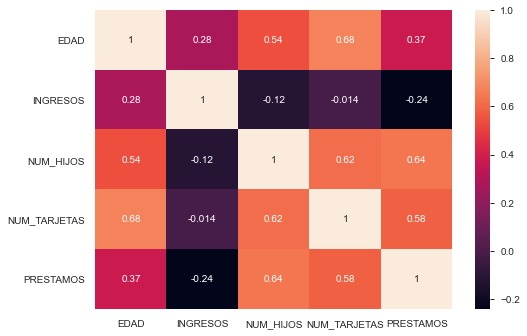

In [10]:
corrV = df_RV.corr()
sns.heatmap(corrV, annot=True)
plt.show()


corrF = df_RF.corr()
sns.heatmap(corrF, annot=True)
plt.show()

In [11]:
#proporcion de usuarios en riesgo
risk_base=pd.DataFrame({'Count':df.groupby(['RIESGO']).size()})
risk_base=risk_base.reset_index()
risk_base['Prop']=risk_base['Count']/risk_base['Count'].sum()

In [12]:
risk_base

,RIESGO,Count,Prop
0,F,3313,0.804712
1,V,804,0.195288


In [13]:
# El 20% de los usuarios que poseen prestamo han incumplido o estan en riesgo de hacerlo con su obligacion

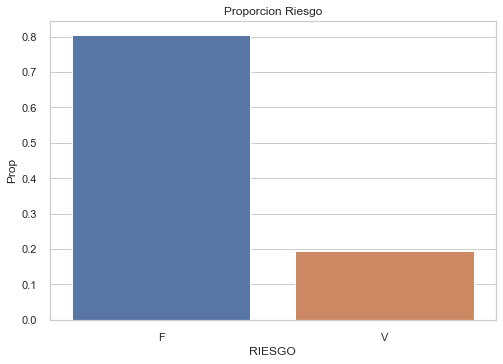

In [14]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x="RIESGO", y="Prop", data=risk_base).set_title("Proporcion Riesgo")

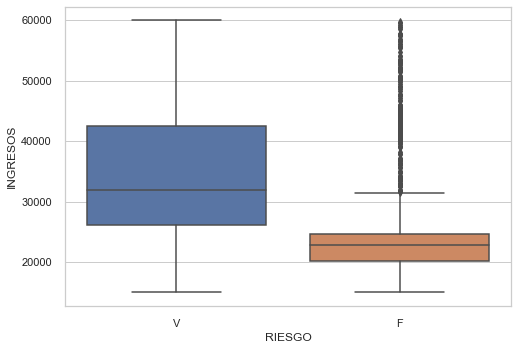

In [15]:
sns.boxplot(data = df, x='RIESGO', y="INGRESOS")

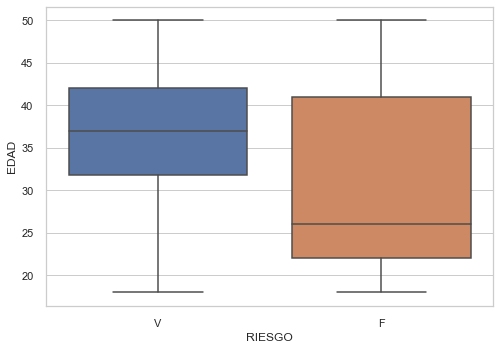

In [16]:
#boxplot Riesgo vs Edad
sns.boxplot(data = df, x='RIESGO', y="EDAD")

In [17]:
# Distribucion del riesgo y del ingreso

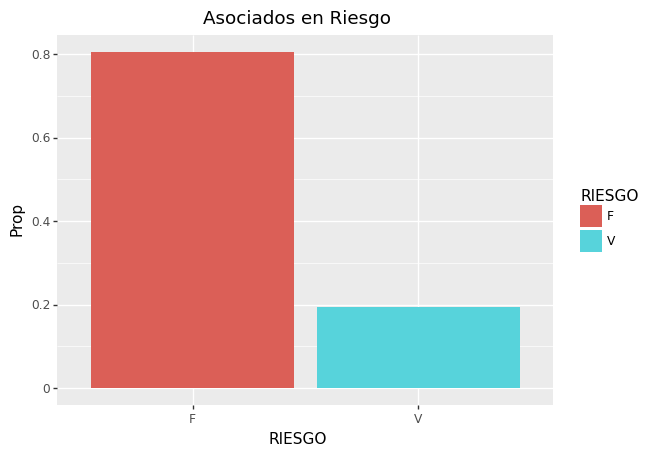

<ggplot: (-9223371898583761548)>

In [18]:
ggplot(aes(x='RIESGO',y='Prop',fill='RIESGO'),data=risk_base)+\
geom_col()+ggtitle('Asociados en Riesgo')

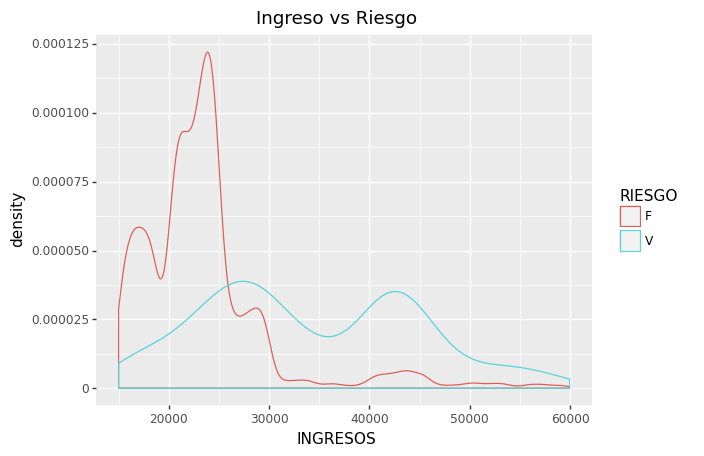

<ggplot: (-9223371898583752792)>

In [19]:
ggplot(aes(x='INGRESOS', color = 'RIESGO'),data=df)+\
geom_density()+ggtitle('Ingreso vs Riesgo')

C:\Users\jhloaiza\Anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 51'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


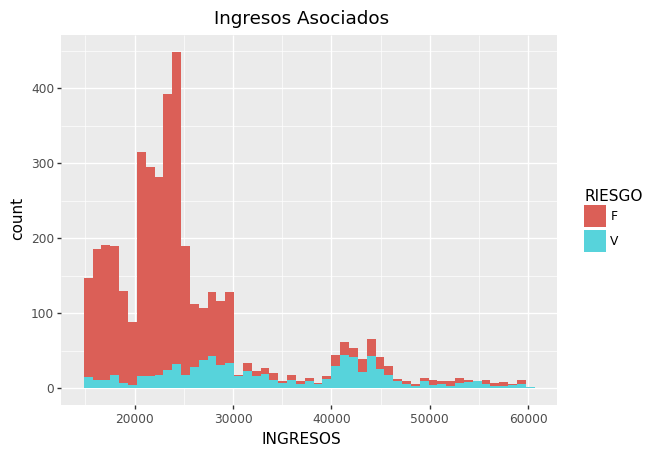

<ggplot: (-9223371898583705396)>

In [20]:
ggplot(aes(x='INGRESOS', fill = 'RIESGO'),data=df)+\
geom_histogram()+ggtitle('Ingresos Asociados')

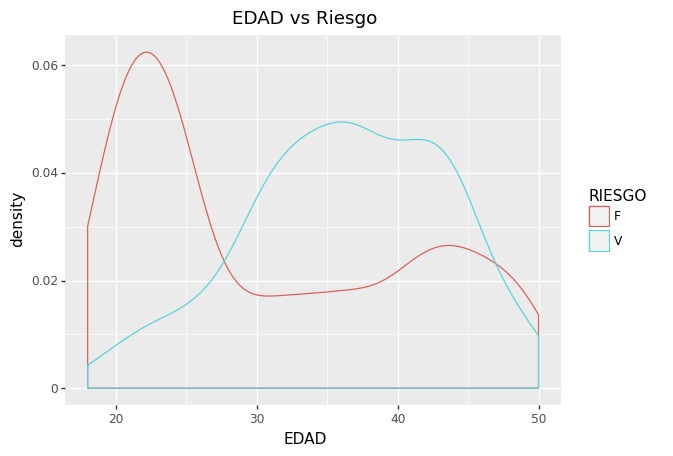

<ggplot: (-9223371898583705372)>

In [21]:
ggplot(aes(x='EDAD',color='RIESGO'),data=df)+\
geom_density()+ggtitle('EDAD vs Riesgo')

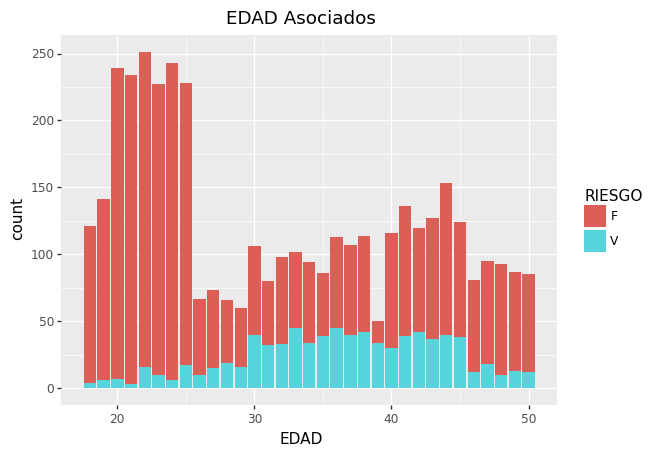

<ggplot: (-9223371898582068528)>

In [22]:
#ggplot(df) + geom_bar(aes(x='EDAD', fill='RIESGO'))
ggplot(aes(x='EDAD', fill="RIESGO"),data=df)+\
geom_bar()+ggtitle('EDAD Asociados')

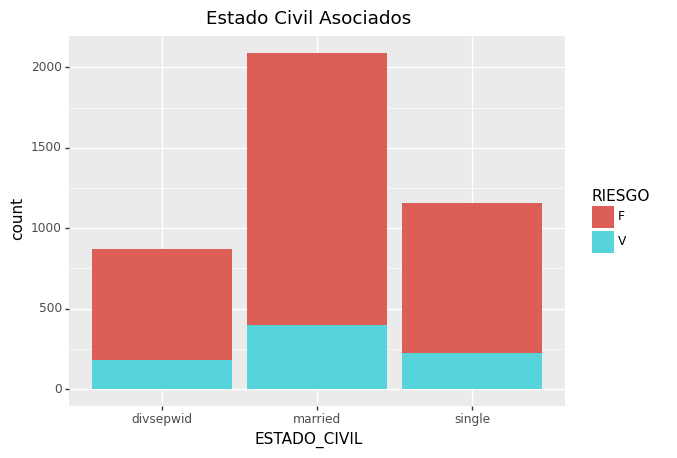

<ggplot: (-9223371898583513100)>

In [23]:
ggplot(df) + geom_bar(aes(x = 'ESTADO_CIVIL', fill = 'RIESGO'))+ggtitle('Estado Civil Asociados')

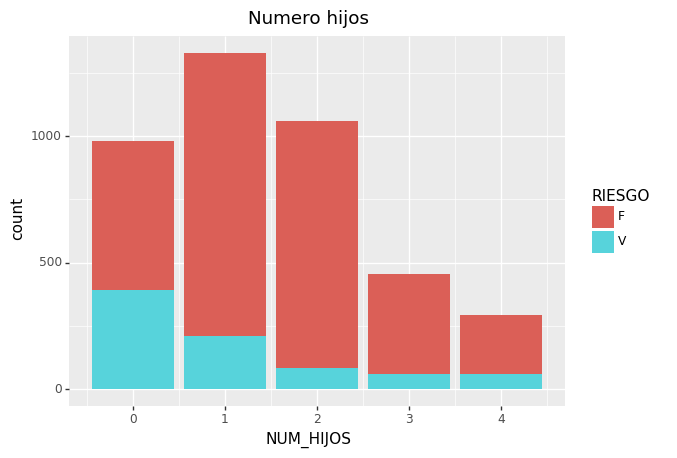

<ggplot: (-9223371898583481868)>

In [24]:
ggplot(df) + geom_bar(aes(x = 'NUM_HIJOS', fill= 'RIESGO'))+ggtitle('Numero hijos')

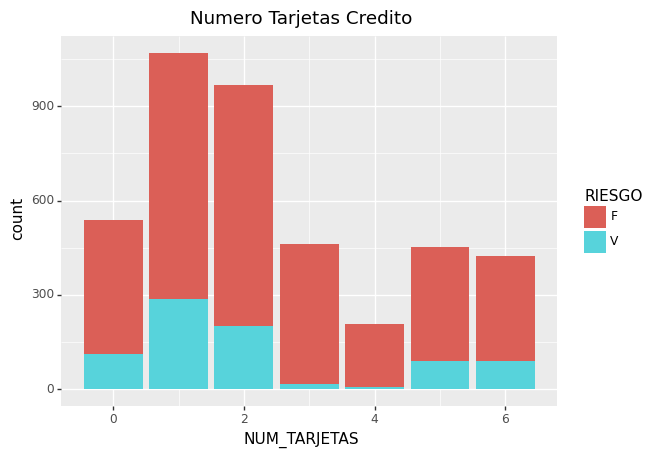

<ggplot: (-9223371898583875088)>

In [25]:
ggplot(df) + geom_bar(aes(x = 'NUM_TARJETAS', fill= 'RIESGO'))+ggtitle('Numero Tarjetas Credito')

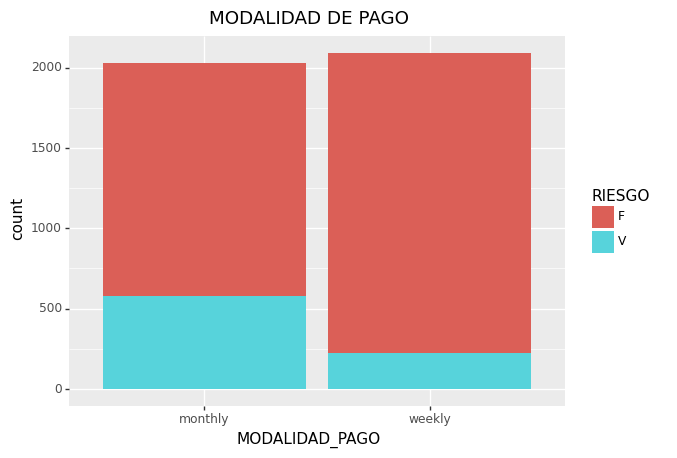

<ggplot: (-9223371898583482116)>

In [26]:
ggplot(df) + geom_bar(aes(x = 'MODALIDAD_PAGO', fill= 'RIESGO'))+ggtitle('MODALIDAD DE PAGO')

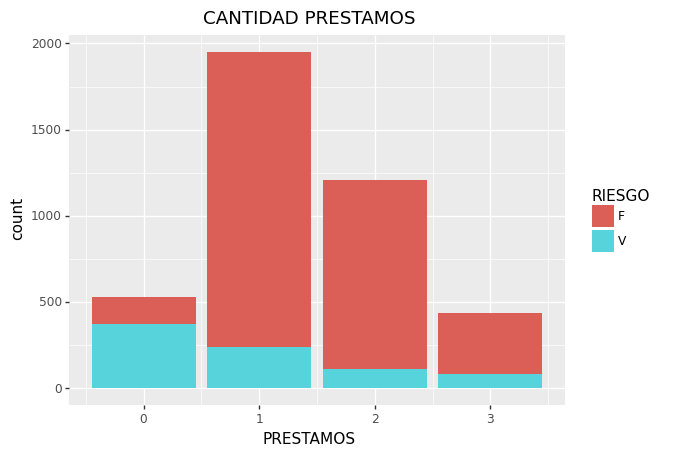

<ggplot: (-9223371898583507432)>

In [27]:
ggplot(df) + geom_bar(aes(x = 'PRESTAMOS', fill= 'RIESGO'))+ggtitle('PRESTAMOS')

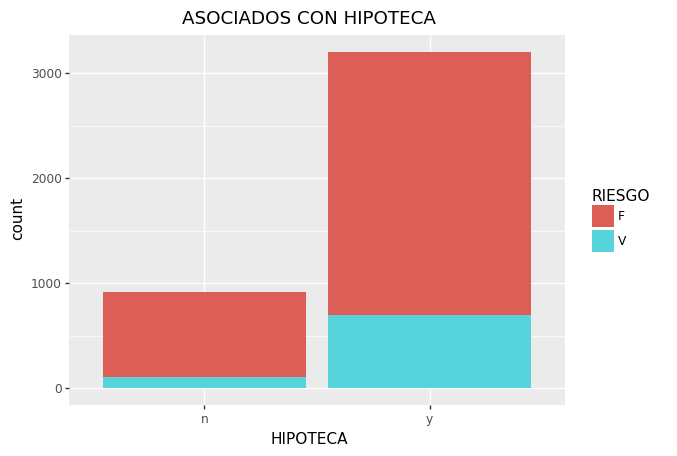

<ggplot: (-9223371898583631024)>

In [28]:
ggplot(df) + geom_bar(aes(x = 'HIPOTECA', fill = 'RIESGO'))+ggtitle('HIPOTECA')

Text(0.5, 1.0, 'INGRESOS y PRESTAMOS')

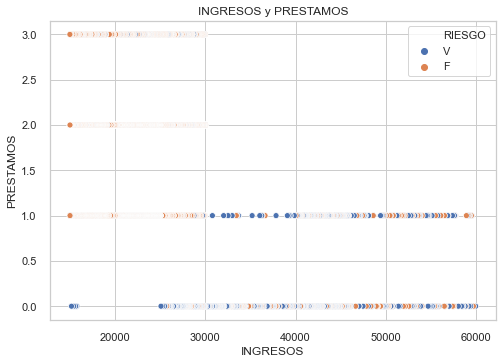

In [29]:
sns.scatterplot(x="INGRESOS", y="PRESTAMOS", hue = "RIESGO", data=df).set_title("INGRESOS y PRESTAMOS")

Text(0.5, 1.0, 'INGRESOS y TARJETAS')

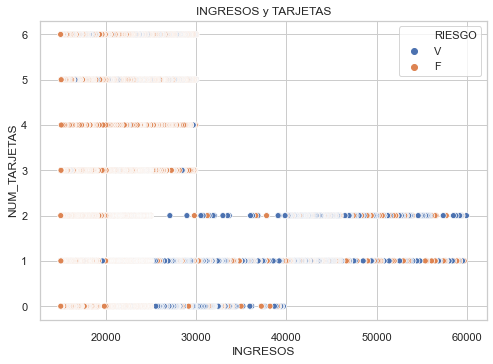

In [30]:
sns.scatterplot(x="INGRESOS", y="NUM_TARJETAS", hue = "RIESGO", data=df).set_title("INGRESOS y TARJETAS")

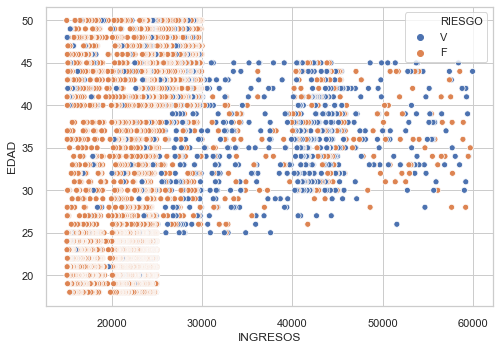

In [31]:
sns.scatterplot(x="INGRESOS", y="EDAD", hue = "RIESGO", data=df)

### agrupamiento de variables continuas y categoricas entre clases (RIESGO)

In [32]:
df.groupby(['RIESGO'])['EDAD', 'INGRESOS', 'NUM_HIJOS','PRESTAMOS',"NUM_TARJETAS"].mean()

C:\Users\jhloaiza\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,EDAD,INGRESOS,NUM_HIJOS,PRESTAMOS,NUM_TARJETAS
RIESGO,,,,,
F,30.722910,23507.066707,1.563538,1.493510,2.490492
V,36.338308,34122.910448,0.995025,0.890547,2.177861


In [33]:
df.groupby(['RIESGO'])['HIPOTECA'].value_counts(normalize=True)

RIESGO  HIPOTECA
F       y           0.754905
        n           0.245095
V       y           0.869403
        n           0.130597
Name: HIPOTECA, dtype: float64

In [34]:
df.groupby(['RIESGO'])['MODALIDAD_PAGO'].value_counts(normalize=True)

RIESGO  MODALIDAD_PAGO
F       weekly            0.562632
        monthly           0.437368
V       monthly           0.717662
        weekly            0.282338
Name: MODALIDAD_PAGO, dtype: float64

In [35]:
df.groupby(['RIESGO'])['ESTADO_CIVIL'].value_counts(normalize=True)

RIESGO  ESTADO_CIVIL
F       married         0.509810
        single          0.280712
        divsepwid       0.209478
V       married         0.497512
        single          0.279851
        divsepwid       0.222637
Name: ESTADO_CIVIL, dtype: float64

In [36]:
df.groupby(['RIESGO'])['GENERO'].value_counts(normalize=True)

RIESGO  GENERO
F       f         0.505886
        m         0.493812
                  0.000302
V       m         0.501244
        f         0.498756
Name: GENERO, dtype: float64

### Preparacion de los datos

### Recodificamos las variables Riesgo, hipoteca y Modalidad de pago

In [37]:
pd.crosstab(df.RIESGO, df.HIPOTECA, normalize = 'columns')

HIPOTECA,n,y
RIESGO,,
F,0.885496,0.781563
V,0.114504,0.218438


In [38]:
pd.crosstab(df.RIESGO, df.MODALIDAD_PAGO, normalize = 'columns')

MODALIDAD_PAGO,monthly,weekly
RIESGO,,
F,0.715202,0.89144
V,0.284798,0.10856


In [39]:
# Cambio las variables a binarias (0, 1)
df['RIESGO']=pd.get_dummies(df.RIESGO)["V"]
df['HIPOTECA'] = pd.get_dummies(df.HIPOTECA)['y']
df['MODALIDAD_PAGO'] = pd.get_dummies(df.MODALIDAD_PAGO)['monthly']

In [40]:
df.groupby(['RIESGO'])['MODALIDAD_PAGO'].value_counts(normalize=True)

RIESGO  MODALIDAD_PAGO
0       0                 0.562632
        1                 0.437368
1       1                 0.717662
        0                 0.282338
Name: MODALIDAD_PAGO, dtype: float64

### el numero de tarjetas parece estar relacionada con el riesgo de no pago, se dicotomiza con poseer 2 tarjetas o menos como 1 y 0 en otro caso

In [41]:
# Creamos una tabla cruzada para verificar el peso del riesgo por la cantidad de tarjetas que tenga el usuario

pd.crosstab(df.RIESGO, df.NUM_TARJETAS)

NUM_TARJETAS,0,1,2,3,4,5,6
RIESGO,,,,,,,
0,425,783,767,444,200,362,332
1,113,287,202,17,6,89,90


In [42]:
pd.crosstab(df.RIESGO, df.NUM_TARJETAS, normalize = 'columns')

NUM_TARJETAS,0,1,2,3,4,5,6
RIESGO,,,,,,,
0,0.789963,0.731776,0.791538,0.963124,0.970874,0.802661,0.78673
1,0.210037,0.268224,0.208462,0.036876,0.029126,0.197339,0.21327


In [43]:
df['tarjetas'] = df['NUM_TARJETAS'].apply(lambda x: 0 if (x>=3)  else 1)
df.head()

,EDAD,INGRESOS,GENERO,ESTADO_CIVIL,NUM_HIJOS,NUM_TARJETAS,MODALIDAD_PAGO,HIPOTECA,PRESTAMOS,RIESGO,tarjetas
ID,,,,,,,,,,,
100756,44,59944,m,married,1,2,1,1,0,1,1
100668,35,59692,,married,1,1,1,1,0,0,1
100418,34,59508,m,married,1,1,1,1,1,1,1
100416,34,59463,m,married,0,2,1,1,1,0,1
100590,39,59393,f,married,0,2,1,1,0,1,1


In [44]:
pd.crosstab(df.RIESGO, df.tarjetas)

tarjetas,0,1
RIESGO,,
0,1338,1975
1,202,602


### Hacemos el mismo ejercicio con la variable hijos

In [45]:
pd.crosstab(df.RIESGO, df.NUM_HIJOS,normalize ='columns')

NUM_HIJOS,0,1,2,3,4
RIESGO,,,,,
0,0.601427,0.843491,0.920904,0.86755,0.791096
1,0.398573,0.156509,0.079096,0.13245,0.208904


Aparece una menor proporcion de usuarios en riesgo con personas con 2 hijos 

categorizamos el numero de hijos de acuerdo a la cantidad tambien, revisamos las tablas cruzadas y su comportamiento

In [46]:
pd.crosstab(df.RIESGO, df.NUM_HIJOS)

NUM_HIJOS,0,1,2,3,4
RIESGO,,,,,
0,590,1121,978,393,231
1,391,208,84,60,61


Categorizamos como 2 hijos igual a 1 y 0 en otro caso en una nueva variable (hijos)

In [47]:
df['hijos'] = df['NUM_HIJOS'].apply(lambda x: 0 if (x>=2) else 1)
df.head()

,EDAD,INGRESOS,GENERO,ESTADO_CIVIL,NUM_HIJOS,NUM_TARJETAS,MODALIDAD_PAGO,HIPOTECA,PRESTAMOS,RIESGO,tarjetas,hijos
ID,,,,,,,,,,,,
100756,44,59944,m,married,1,2,1,1,0,1,1,1
100668,35,59692,,married,1,1,1,1,0,0,1,1
100418,34,59508,m,married,1,1,1,1,1,1,1,1
100416,34,59463,m,married,0,2,1,1,1,0,1,1
100590,39,59393,f,married,0,2,1,1,0,1,1,1


In [48]:
pd.crosstab(df.RIESGO, df.hijos)

hijos,0,1
RIESGO,,
0,1602,1711
1,205,599


In [49]:
pd.crosstab(df.RIESGO, df.ESTADO_CIVIL, normalize = 'columns')

ESTADO_CIVIL,divsepwid,married,single
RIESGO,,,
0,0.79496,0.808521,0.805195
1,0.20504,0.191479,0.194805


In [50]:
# Codificamos la variable PRESTAMOS de la misma forma, analizando la tabla cruzada
pd.crosstab(df.RIESGO, df.PRESTAMOS, normalize = 'columns')

PRESTAMOS,0,1,2,3
RIESGO,,,,
0,0.299242,0.878399,0.907054,0.804598
1,0.700758,0.121601,0.092946,0.195402


In [51]:
pd.crosstab(df.RIESGO, df.PRESTAMOS)

PRESTAMOS,0,1,2,3
RIESGO,,,,
0,158,1712,1093,350
1,370,237,112,85


In [52]:
#Codificamos la variable prestamos como 0 si no ha tenido prestamos, 1 si tiene o ha tenido al menos 1

df['prestamos'] = df['PRESTAMOS'].apply(lambda x: 1 if (x<=1) else 0)
df.head()

,EDAD,INGRESOS,GENERO,ESTADO_CIVIL,NUM_HIJOS,NUM_TARJETAS,MODALIDAD_PAGO,HIPOTECA,PRESTAMOS,RIESGO,tarjetas,hijos,prestamos
ID,,,,,,,,,,,,,
100756,44,59944,m,married,1,2,1,1,0,1,1,1,1
100668,35,59692,,married,1,1,1,1,0,0,1,1,1
100418,34,59508,m,married,1,1,1,1,1,1,1,1,1
100416,34,59463,m,married,0,2,1,1,1,0,1,1,1
100590,39,59393,f,married,0,2,1,1,0,1,1,1,1


 La variable genero tiene un dato faltante, dato que el registro presenta completitud, se completa el dato faltante con la moda, en este caso es 'f'

In [53]:
df['GENERO'].replace({" ": "f"}, inplace=True)

Codificamos la variable genero como 1 si es F y 0 si es m

In [54]:
df['GENERO'] = pd.get_dummies(df.GENERO)['f']

In [55]:
# Verificamos la variable Estado civil vs riesgo, para hacer one hot encoding

In [56]:
df.groupby(['ESTADO_CIVIL'])['RIESGO'].value_counts(normalize=True)

ESTADO_CIVIL  RIESGO
divsepwid     0         0.794960
              1         0.205040
married       0         0.808521
              1         0.191479
single        0         0.805195
              1         0.194805
Name: RIESGO, dtype: float64

# Agrupacion de variable INGRESOS

In [57]:
df.describe()

,EDAD,INGRESOS,GENERO,NUM_HIJOS,NUM_TARJETAS,MODALIDAD_PAGO,HIPOTECA,PRESTAMOS,RIESGO,tarjetas,hijos,prestamos
count,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000
mean,31.819529,25580.211805,0.504736,1.452514,2.429439,0.492106,0.777265,1.375759,0.195288,0.625941,0.561088,0.601652
std,9.876729,8766.867219,0.500038,1.170579,1.880721,0.499998,0.416132,0.838183,0.396470,0.483938,0.496314,0.489617
min,18.000000,15005.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,20497.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,31.000000,23490.000000,1.000000,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,41.000000,27566.000000,1.000000,2.000000,4.000000,1.000000,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000
max,50.000000,59944.000000,1.000000,4.000000,6.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
# dado que la variabel ingresos se concentra principalmente en los rangos bajos, generamos los rangos teniendo en cuenta esta distribucion

In [59]:
df['ingreso_r']=df['INGRESOS'].apply(lambda x: '0.Menos de 20500' if x<=20500 else (#
 '1.20500-28000' if x>20500 and x<=28000 else ('3.Mas de 28000')))

#df['ingreso_r'] = pd.cut(df['INGRESOS'], bins=3)
#df.head()

In [60]:
pd.crosstab(df.RIESGO, df.ingreso_r, normalize = 'columns')

ingreso_r,0.Menos de 20500,1.20500-28000,3.Mas de 28000
RIESGO,,,
0,0.931135,0.899578,0.456545
1,0.068865,0.100422,0.543455


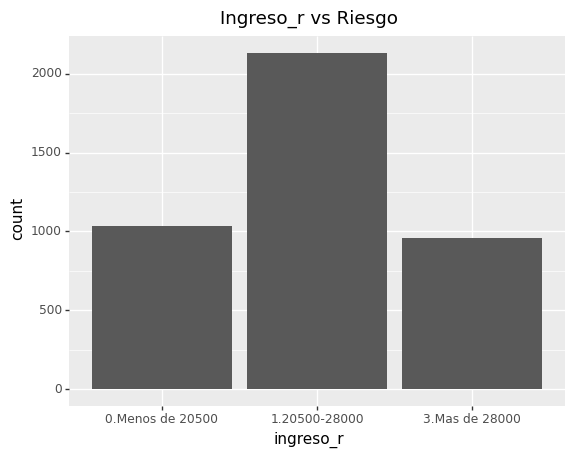

<ggplot: (-9223371898584123452)>

In [61]:
ggplot(df) + geom_bar(aes(x = 'ingreso_r', fill = 'RIESGO'))+ggtitle('Ingreso_r vs Riesgo')

In [62]:
# Label Encoder para la variable ingresos

le=LabelEncoder()
ingreso_r_cod=le.fit_transform(df.ingreso_r)
df.loc[:,'ingreso_r_cod'] = ingreso_r_cod
df.head(5)

,EDAD,INGRESOS,GENERO,ESTADO_CIVIL,NUM_HIJOS,NUM_TARJETAS,MODALIDAD_PAGO,HIPOTECA,PRESTAMOS,RIESGO,tarjetas,hijos,prestamos,ingreso_r,ingreso_r_cod
ID,,,,,,,,,,,,,,,
100756,44,59944,0,married,1,2,1,1,0,1,1,1,1,3.Mas de 28000,2
100668,35,59692,1,married,1,1,1,1,0,0,1,1,1,3.Mas de 28000,2
100418,34,59508,0,married,1,1,1,1,1,1,1,1,1,3.Mas de 28000,2
100416,34,59463,0,married,0,2,1,1,1,0,1,1,1,3.Mas de 28000,2
100590,39,59393,1,married,0,2,1,1,0,1,1,1,1,3.Mas de 28000,2


### Codificamos la variable edad

In [63]:
df['edad_r']=df['EDAD'].apply(lambda x: '0.18 a 30' if x<=30 else (
 '1.30-50' if x>30 and x<=40 else ('3.Mas de 40')))

#df['ingreso_r'] = pd.cut(df['INGRESOS'], bins=3)
#df.head()

In [64]:
# Label Encoder para la variable edad

le=LabelEncoder()
edad_r_cod=le.fit_transform(df.edad_r)
df.loc[:,'edad_r_cod'] = edad_r_cod
df.head(5)

,EDAD,INGRESOS,GENERO,ESTADO_CIVIL,NUM_HIJOS,NUM_TARJETAS,MODALIDAD_PAGO,HIPOTECA,PRESTAMOS,RIESGO,tarjetas,hijos,prestamos,ingreso_r,ingreso_r_cod,edad_r,edad_r_cod
ID,,,,,,,,,,,,,,,,,
100756,44,59944,0,married,1,2,1,1,0,1,1,1,1,3.Mas de 28000,2,3.Mas de 40,2
100668,35,59692,1,married,1,1,1,1,0,0,1,1,1,3.Mas de 28000,2,1.30-50,1
100418,34,59508,0,married,1,1,1,1,1,1,1,1,1,3.Mas de 28000,2,1.30-50,1
100416,34,59463,0,married,0,2,1,1,1,0,1,1,1,3.Mas de 28000,2,1.30-50,1
100590,39,59393,1,married,0,2,1,1,0,1,1,1,1,3.Mas de 28000,2,1.30-50,1


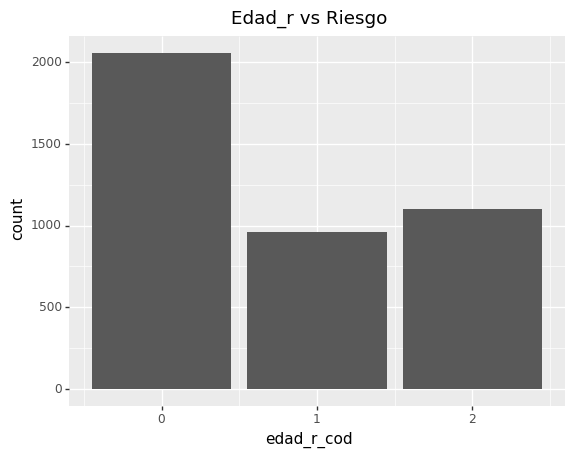

<ggplot: (-9223371898583482156)>

In [65]:
ggplot(df) + geom_bar(aes(x = 'edad_r_cod', fill = 'RIESGO'))+ggtitle('Edad_r vs Riesgo')

### One Hot encoding para la variable Estado_Civil

In [66]:
# primero seleccionamos las variables X para trabajar en los modelos

#inspeccionamos la variable ESTADO CIVIL
pd.crosstab(df.RIESGO, df.ESTADO_CIVIL, normalize = 'columns')

ESTADO_CIVIL,divsepwid,married,single
RIESGO,,,
0,0.79496,0.808521,0.805195
1,0.20504,0.191479,0.194805


In [67]:
Feature = df[['EDAD','INGRESOS','GENERO','hijos','tarjetas','MODALIDAD_PAGO','HIPOTECA', 'prestamos']]
Feature = pd.concat([Feature,pd.get_dummies(df['ESTADO_CIVIL'])], axis=1)
Feature.drop(['divsepwid'], axis = 1,inplace=True)
Feature.head()

,EDAD,INGRESOS,GENERO,hijos,tarjetas,MODALIDAD_PAGO,HIPOTECA,prestamos,married,single
ID,,,,,,,,,,
100756,44,59944,0,1,1,1,1,1,1,0
100668,35,59692,1,1,1,1,1,1,1,0
100418,34,59508,0,1,1,1,1,1,1,0
100416,34,59463,0,1,1,1,1,1,1,0
100590,39,59393,1,1,1,1,1,1,1,0


# Creacion datasets de train y test - estandarizacion

In [68]:
X=Feature
y = df['RIESGO'].values

In [69]:
X.head()

,EDAD,INGRESOS,GENERO,hijos,tarjetas,MODALIDAD_PAGO,HIPOTECA,prestamos,married,single
ID,,,,,,,,,,
100756,44,59944,0,1,1,1,1,1,1,0
100668,35,59692,1,1,1,1,1,1,1,0
100418,34,59508,0,1,1,1,1,1,1,0
100416,34,59463,0,1,1,1,1,1,1,0
100590,39,59393,1,1,1,1,1,1,1,0


In [70]:
y[0:5]

array([1, 0, 1, 0, 1], dtype=uint8)

# Estandarizacion de los datos

In [71]:
from  sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.23339926,  3.92021021, -1.00951821,  0.88444959,  0.77304211,
         1.01591482,  0.53531533,  0.81368989,  0.98529154, -0.62445114],
       [ 0.32205576,  3.89146213,  0.99057153,  0.88444959,  0.77304211,
         1.01591482,  0.53531533,  0.81368989,  0.98529154, -0.62445114],
       [ 0.22079537,  3.87047146, -1.00951821,  0.88444959,  0.77304211,
         1.01591482,  0.53531533,  0.81368989,  0.98529154, -0.62445114],
       [ 0.22079537,  3.86533788, -1.00951821,  0.88444959,  0.77304211,
         1.01591482,  0.53531533,  0.81368989,  0.98529154, -0.62445114],
       [ 0.72709731,  3.8573523 ,  0.99057153,  0.88444959,  0.77304211,
         1.01591482,  0.53531533,  0.81368989,  0.98529154, -0.62445114]])

## Datasets train y test

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [73]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2881, 10) (2881,)
Test set: (1236, 10) (1236,)


## Tratamiento datos no balanceados

Como se vio que el 20% de los usuarios en la base tienen riesgo y no afectar el modelo para que sea mas sensible a estas personas en riesgo, balanceamos los datos 

In [74]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

rus = RandomOverSampler(random_state=4,sampling_strategy=0.5)
X_train_r, y_train_r = rus.fit_resample(X_train,y_train)

data_r=pd.DataFrame(np.column_stack([X_train_r,y_train_r])).sample(frac=1).values

nrow,ncol=data_r.shape
X_train_r=data_r[:,0:(ncol-1)]
y_train_r=data_r[:,-1]
y_train=y_train_r

In [75]:
print(X_train_r.shape)
print(X_test.shape)

print(y_train_r.shape)
print(y_test.shape)

(3478, 10)
(1236, 10)
(3478,)
(1236,)


## Performance del clasificador

In [76]:
from sklearn.metrics import precision_score,recall_score,accuracy_score
from sklearn.metrics import jaccard_score, f1_score, log_loss , cohen_kappa_score
from sklearn.metrics import roc_auc_score

def metrics(real,pred):
  kappa=cohen_kappa_score(real,pred)
  acc=accuracy_score(real,pred)
  f1=f1_score(real,pred)
  prec=precision_score(real,pred)
  recall=recall_score(real,pred)
  jaccard=jaccard_score(real,pred)
  logloss=log_loss(real,pred)
  roc_score = roc_auc_score(real,pred)


  print (f" Accuracy:{acc:.4f} \n Precision: {prec:.4f} \n Recall: {recall:.4f} \n Kappa: {kappa:.4f} \n F1-Score: {f1:.4f} \n Jaccard: {jaccard:.4f} \n logloss: {logloss:.4f} \n Roc_score: {roc_score:.4f}")

# Corremos diversos modelos para encontrar el que mejor se ajuste a los datos

# KNN model

In [80]:
from sklearn.neighbors import KNeighborsClassifier
k = 3
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train_r,y_train_r)
kNN_model

KNeighborsClassifier(n_neighbors=3)

In [81]:
yhat = kNN_model.predict(X_test)

In [82]:
# Hallamos el mejor k
Ks=100
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Entrenamos el modelo y predecimos 
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train_r,y_train_r)
    yhat = kNN_model.predict(X_test)
    
    
    mean_acc[n-1]=np.mean(yhat==y_test);
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.80016181, 0.80420712, 0.79126214, 0.81634304, 0.81472492,
       0.83737864, 0.82686084, 0.84142395, 0.83009709, 0.84627832,
       0.83090615, 0.84223301, 0.83171521, 0.85194175, 0.84466019,
       0.85679612, 0.85275081, 0.85760518, 0.85598706, 0.85760518,
       0.84951456, 0.85760518, 0.85275081, 0.85598706, 0.85113269,
       0.8592233 , 0.85679612, 0.86245955, 0.85841424, 0.86165049,
       0.85841424, 0.86165049, 0.85679612, 0.86165049, 0.86165049,
       0.86245955, 0.8592233 , 0.86245955, 0.85841424, 0.86569579,
       0.86326861, 0.86488673, 0.86165049, 0.86650485, 0.86488673,
       0.86569579, 0.86569579, 0.86731392, 0.86569579, 0.86731392,
       0.86650485, 0.86893204, 0.86893204, 0.86893204, 0.86893204,
       0.86893204, 0.86812298, 0.86812298, 0.86893204, 0.86812298,
       0.86812298, 0.86812298, 0.86812298, 0.86812298, 0.86731392,
       0.86731392, 0.86731392, 0.86812298, 0.86812298, 0.86812298,
       0.86893204, 0.86893204, 0.86893204, 0.86893204, 0.86893

The best accuracy was with 0.8689320388349514 with k= 52


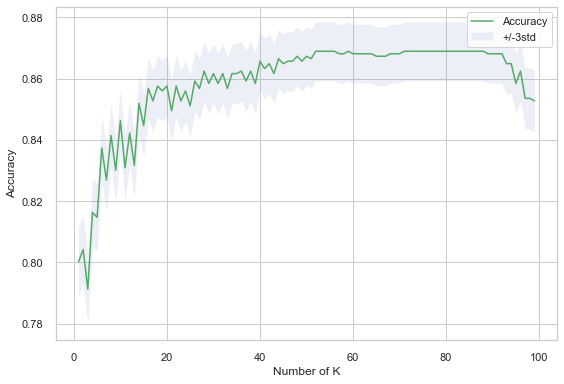

In [83]:
#plot model accuracy for different Ks
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc-1*std_acc,mean_acc+1*std_acc, alpha=0.1)
plt.legend(('Accuracy','+/-3std'))
plt.ylabel('Accuracy')
plt.xlabel('Number of K')
plt.tight_layout()
plt.show

print("The best accuracy was with", mean_acc.max(),"with k=", mean_acc.argmax()+1)

In [84]:
# corremos el modelo de nuevo, usando k=24
from sklearn.neighbors import KNeighborsClassifier
k = 52
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train_r,y_train_r)

yhat_KNN=kNN_model.predict(X_test)


In [85]:
#nuevo resultado con categorizacion de ingresos (otros rangos)
metrics(y_test,yhat_KNN)

 Accuracy:0.8689 
 Precision: 0.6653 
 Recall: 0.6653 
 Kappa: 0.5838 
 F1-Score: 0.6653 
 Jaccard: 0.4985 
 logloss: 4.5270 
 Roc_score: 0.7919


In [86]:
# resultado sin categorizacion de ingresos
metrics(y_test,yhat_KNN)

 Accuracy:0.8689 
 Precision: 0.6653 
 Recall: 0.6653 
 Kappa: 0.5838 
 F1-Score: 0.6653 
 Jaccard: 0.4985 
 logloss: 4.5270 
 Roc_score: 0.7919


# Arbol de decision

In [87]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="entropy", class_weight='balanced',max_depth = 2, random_state=4)
DT_model.fit(X_train_r,y_train_r)
DT_model
#{criterion = entropy}

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=2, random_state=4)

In [88]:
yhat_DT = DT_model.predict(X_test)
yhat_DT

array([0., 0., 0., ..., 1., 0., 1.])

In [89]:
#con rangos en ingresos y edad
metrics(y_test,yhat_DT)

 Accuracy:0.8730 
 Precision: 0.6778 
 Recall: 0.6694 
 Kappa: 0.5947 
 F1-Score: 0.6736 
 Jaccard: 0.5078 
 logloss: 4.3873 
 Roc_score: 0.7960


In [90]:
#sin rangos en ingresos y edad
metrics(y_test,yhat_DT)

 Accuracy:0.8730 
 Precision: 0.6778 
 Recall: 0.6694 
 Kappa: 0.5947 
 F1-Score: 0.6736 
 Jaccard: 0.5078 
 logloss: 4.3873 
 Roc_score: 0.7960


In [91]:
metrics(y_test,yhat_DT)

 Accuracy:0.8730 
 Precision: 0.6778 
 Recall: 0.6694 
 Kappa: 0.5947 
 F1-Score: 0.6736 
 Jaccard: 0.5078 
 logloss: 4.3873 
 Roc_score: 0.7960


# SVM

In [92]:
from sklearn import svm
SVM_model = svm.SVC(kernel = 'rbf', C = 1000, gamma = 0.001, random_state=4)
SVM_model.fit(X_train_r, y_train_r) 

#{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}



SVC(C=1000, gamma=0.001, random_state=4)

In [93]:
yhat_SVM = SVM_model.predict(X_test)
yhat_SVM

array([0., 0., 0., ..., 1., 0., 1.])

In [94]:
#con rangos edad e ingresos
metrics(y_test,yhat_SVM)

 Accuracy:0.8714 
 Precision: 0.6722 
 Recall: 0.6694 
 Kappa: 0.5909 
 F1-Score: 0.6708 
 Jaccard: 0.5047 
 logloss: 4.4431 
 Roc_score: 0.7950


In [95]:
#con ajuste de gridsearch
metrics(y_test,yhat_SVM)

 Accuracy:0.8714 
 Precision: 0.6722 
 Recall: 0.6694 
 Kappa: 0.5909 
 F1-Score: 0.6708 
 Jaccard: 0.5047 
 logloss: 4.4431 
 Roc_score: 0.7950


In [96]:
#metricas con parametros standard (rbf unicamente)
metrics(y_test,yhat_SVM)

 Accuracy:0.8714 
 Precision: 0.6722 
 Recall: 0.6694 
 Kappa: 0.5909 
 F1-Score: 0.6708 
 Jaccard: 0.5047 
 logloss: 4.4431 
 Roc_score: 0.7950


In [97]:
### Usando SVM con kernel sigmoid 

In [98]:
SVM1_model = svm.SVC(kernel = 'sigmoid', random_state=4)
SVM1_model.fit(X_train_r, y_train_r) 

SVC(kernel='sigmoid', random_state=4)

In [99]:
yhat_SVM1 = SVM1_model.predict(X_test)
yhat_SVM1

array([0., 0., 0., ..., 0., 0., 1.])

In [100]:
metrics(y_test,yhat_SVM1)

 Accuracy:0.7160 
 Precision: 0.3411 
 Recall: 0.4835 
 Kappa: 0.2212 
 F1-Score: 0.4000 
 Jaccard: 0.2500 
 logloss: 9.8085 
 Roc_score: 0.6281


In [101]:
### usamos SVM con kernel linear

In [102]:
SVM2_model = svm.SVC(kernel = 'linear', random_state=4)
SVM2_model.fit(X_train_r, y_train_r) 

SVC(kernel='linear', random_state=4)

In [103]:
yhat_SVM2 = SVM2_model.predict(X_test)

metrics(y_test,yhat_SVM2)

 Accuracy:0.8697 
 Precision: 0.6738 
 Recall: 0.6488 
 Kappa: 0.5805 
 F1-Score: 0.6611 
 Jaccard: 0.4937 
 logloss: 4.4990 
 Roc_score: 0.7862


In [104]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, yhat_SVM2)

array([[918,  76],
       [ 85, 157]], dtype=int64)

# Logistico

In [105]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=0.1, class_weight='balanced', solver='liblinear', max_iter=10000, random_state=4).fit(X_train_r,y_train_r)
LR_model

LogisticRegression(C=0.1, class_weight='balanced', max_iter=10000,
                   random_state=4, solver='liblinear')

In [106]:
yhat_LR = LR_model.predict(X_test)

In [107]:
#con parametros gridsearch recall
metrics(y_test,yhat_LR)

 Accuracy:0.7888 
 Precision: 0.4764 
 Recall: 0.7934 
 Kappa: 0.4643 
 F1-Score: 0.5953 
 Jaccard: 0.4238 
 logloss: 7.2935 
 Roc_score: 0.7906


In [108]:
#default
metrics(y_test,yhat_LR)

 Accuracy:0.7888 
 Precision: 0.4764 
 Recall: 0.7934 
 Kappa: 0.4643 
 F1-Score: 0.5953 
 Jaccard: 0.4238 
 logloss: 7.2935 
 Roc_score: 0.7906


In [109]:
#c=0.001, classweitgh = balanced y max_iter=10000
metrics(y_test,yhat_LR)

 Accuracy:0.7888 
 Precision: 0.4764 
 Recall: 0.7934 
 Kappa: 0.4643 
 F1-Score: 0.5953 
 Jaccard: 0.4238 
 logloss: 7.2935 
 Roc_score: 0.7906


In [110]:
#c=0.001
metrics(y_test,yhat_LR)

 Accuracy:0.7888 
 Precision: 0.4764 
 Recall: 0.7934 
 Kappa: 0.4643 
 F1-Score: 0.5953 
 Jaccard: 0.4238 
 logloss: 7.2935 
 Roc_score: 0.7906


In [111]:
#c=100
metrics(y_test,yhat_LR)

 Accuracy:0.7888 
 Precision: 0.4764 
 Recall: 0.7934 
 Kappa: 0.4643 
 F1-Score: 0.5953 
 Jaccard: 0.4238 
 logloss: 7.2935 
 Roc_score: 0.7906


# MLP

In [112]:
from sklearn.neural_network import MLPClassifier
MLP_model = MLPClassifier(alpha=0.01, max_iter=10000000, random_state=4).fit(X_train_r,y_train_r)
MLP_model

MLPClassifier(alpha=0.01, max_iter=10000000, random_state=4)

In [113]:
yhat_MLP = MLP_model.predict(X_test)

In [114]:
#alpha=0.01, max_iter=100000
metrics(y_test,yhat_MLP)

 Accuracy:0.8657 
 Precision: 0.6508 
 Recall: 0.6777 
 Kappa: 0.5801 
 F1-Score: 0.6640 
 Jaccard: 0.4970 
 logloss: 4.6388 
 Roc_score: 0.7946


In [115]:
#alpha=1, max_iter=100000
metrics(y_test,yhat_MLP)

 Accuracy:0.8657 
 Precision: 0.6508 
 Recall: 0.6777 
 Kappa: 0.5801 
 F1-Score: 0.6640 
 Jaccard: 0.4970 
 logloss: 4.6388 
 Roc_score: 0.7946


In [116]:
metrics(y_test,yhat_MLP)

 Accuracy:0.8657 
 Precision: 0.6508 
 Recall: 0.6777 
 Kappa: 0.5801 
 F1-Score: 0.6640 
 Jaccard: 0.4970 
 logloss: 4.6388 
 Roc_score: 0.7946


In [117]:
# alpha=1, max_iter=1000
metrics(y_test,yhat_MLP)

 Accuracy:0.8657 
 Precision: 0.6508 
 Recall: 0.6777 
 Kappa: 0.5801 
 F1-Score: 0.6640 
 Jaccard: 0.4970 
 logloss: 4.6388 
 Roc_score: 0.7946


# Random Forest

In [118]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(criterion='entropy',max_depth=4,random_state=4).fit(X_train_r,y_train_r)
RF_model

RandomForestClassifier(criterion='entropy', max_depth=4, random_state=4)

In [119]:
yhat_RF = RF_model.predict(X_test)

In [120]:
metrics(y_test,yhat_RF)

 Accuracy:0.8730 
 Precision: 0.6778 
 Recall: 0.6694 
 Kappa: 0.5947 
 F1-Score: 0.6736 
 Jaccard: 0.5078 
 logloss: 4.3873 
 Roc_score: 0.7960


In [121]:
metrics(y_test,yhat_RF)

 Accuracy:0.8730 
 Precision: 0.6778 
 Recall: 0.6694 
 Kappa: 0.5947 
 F1-Score: 0.6736 
 Jaccard: 0.5078 
 logloss: 4.3873 
 Roc_score: 0.7960


In [122]:
metrics(y_test,yhat_RF)

 Accuracy:0.8730 
 Precision: 0.6778 
 Recall: 0.6694 
 Kappa: 0.5947 
 F1-Score: 0.6736 
 Jaccard: 0.5078 
 logloss: 4.3873 
 Roc_score: 0.7960


# ADA Boost

In [123]:
from sklearn.ensemble import  AdaBoostClassifier
Ada_model = AdaBoostClassifier(n_estimators=1000, random_state=4).fit(X_train_r,y_train_r)
Ada_model

AdaBoostClassifier(n_estimators=1000, random_state=4)

In [124]:
yhat_Ada = Ada_model.predict(X_test)

In [125]:
metrics(y_test,yhat_Ada)

 Accuracy:0.8301 
 Precision: 0.5567 
 Recall: 0.6488 
 Kappa: 0.4922 
 F1-Score: 0.5992 
 Jaccard: 0.4278 
 logloss: 5.8683 
 Roc_score: 0.7615


# Gradient Boosting

In [129]:
from sklearn.ensemble import GradientBoostingClassifier
GB_model = GradientBoostingClassifier(n_estimators=1000,random_state=4).fit(X_train_r,y_train_r)
GB_model 

GradientBoostingClassifier(n_estimators=1000, random_state=4)

In [127]:
yhat_GB = GB_model.predict(X_test)

In [128]:
metrics(y_test,yhat_GB)

 Accuracy:0.8665 
 Precision: 0.6571 
 Recall: 0.6653 
 Kappa: 0.5781 
 F1-Score: 0.6612 
 Jaccard: 0.4939 
 logloss: 4.6108 
 Roc_score: 0.7904


# Ajustando parametros de modelos

# modelo SVC

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

#from sklearn import svm

#SVM_model = svm.SVC(kernel = 'rbf', random_state=4)
#SVM_model.fit(X_train_r, y_train_r) 

print(__doc__)

# Loading the Digits dataset
#digits = datasets.load_digits()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
#n_samples = len(digits.images)
#X = digits.images.reshape((n_samples, -1))
#y = digits.target

# Split the dataset in two equal parts
#X_train, X_test, y_train, y_test = train_test_split(
#    X, y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        SVC(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train_r, y_train_r)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()


Automatically created module for IPython interactive environment
# Tuning hyper-parameters for precision



C:\Users\jhloaiza\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jhloaiza\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jhloaiza\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jhloaiza\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221

Best parameters set found on development set:

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.810 (+/-0.010) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.333 (+/-0.000) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.823 (+/-0.021) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.810 (+/-0.010) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.824 (+/-0.019) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.821 (+/-0.018) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.824 (+/-0.021) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.824 (+/-0.024) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.822 (+/-0.024) for {'C': 1, 'kernel': 'linear'}
0.822 (+/-0.025) for {'C': 10, 'kernel': 'linear'}
0.822 (+/-0.025) for {'C': 100, 'kernel': 'linear'}
0.822 (+/-0.025) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

            

# modelo Decision Tree

In [131]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

# Set the parameters by cross-validation
tuned_parameters = [{'criterion': ['gini','entropy'], 'class_weight': ['balanced'],
                     'ccp_alpha': [0.001,0.01,0.1, 1], 
                     },
                    ]

scores = ['precision', 'recall']

for score in scores:
    #print("# Tuning hyper-parameters for %s" % score)
    #print()

    clf = GridSearchCV(
        DecisionTreeClassifier(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train_r, y_train_r)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()


C:\Users\jhloaiza\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jhloaiza\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jhloaiza\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jhloaiza\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221

Best parameters set found on development set:

{'ccp_alpha': 0.001, 'class_weight': 'balanced', 'criterion': 'entropy'}

Grid scores on development set:

0.800 (+/-0.018) for {'ccp_alpha': 0.001, 'class_weight': 'balanced', 'criterion': 'gini'}
0.834 (+/-0.010) for {'ccp_alpha': 0.001, 'class_weight': 'balanced', 'criterion': 'entropy'}
0.828 (+/-0.024) for {'ccp_alpha': 0.01, 'class_weight': 'balanced', 'criterion': 'gini'}
0.796 (+/-0.039) for {'ccp_alpha': 0.01, 'class_weight': 'balanced', 'criterion': 'entropy'}
0.768 (+/-0.020) for {'ccp_alpha': 0.1, 'class_weight': 'balanced', 'criterion': 'gini'}
0.768 (+/-0.020) for {'ccp_alpha': 0.1, 'class_weight': 'balanced', 'criterion': 'entropy'}
0.333 (+/-0.000) for {'ccp_alpha': 1, 'class_weight': 'balanced', 'criterion': 'gini'}
0.333 (+/-0.000) for {'ccp_alpha': 1, 'class_weight': 'balanced', 'criterion': 'entropy'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full 

# modelo MLP

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier


# Set the parameters by cross-validation
tuned_parameters = [{'hidden_layer_sizes': (100,100,100), 
                     'alpha': [0.001,0.01,0.1, 1,10], 'max_iter':[10000]
                     },
                    ]

scores = ['precision', 'recall']

for score in scores:
    #print("# Tuning hyper-parameters for %s" % score)
    #print()

    clf = GridSearchCV(
        MLPClassifier(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train_r, y_train_r)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()


C:\Users\jhloaiza\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


# Logistico

In [132]:
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline([
  ('clf', LogisticRegression(penalty='l2',class_weight='balanced', dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=10000,
                                    multi_class='auto', n_jobs=None,
                                    random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))])

params = {'clf__C':[0.001,0.01,0.1,1,10,100,200]}
scoring={'kappa':make_scorer(cohen_kappa_score),'accuracy':'accuracy'}
grid= GridSearchCV(pipeline, params,scoring=scoring,refit='kappa')
grid.fit(X_train_r, y_train_r)
pred=grid.predict(X_test)
pred_train=grid.predict(X_train_r)
print(grid.best_params_)

metrics(y_test,pred)

{'clf__C': 0.001}
 Accuracy:0.8382 
 Precision: 0.5705 
 Recall: 0.7025 
 Kappa: 0.5275 
 F1-Score: 0.6296 
 Jaccard: 0.4595 
 logloss: 5.5889 
 Roc_score: 0.7869


# SVM

In [133]:
steps = [("SVM_rbf", SVC(kernel="rbf",probability=True))]
pipeline = Pipeline(steps)
parametros = {'SVM_rbf__C':[0.01,0.1,1,10], 'SVM_rbf__gamma':[0.05,0.01, 1, 5]}
grid1 = GridSearchCV(pipeline, param_grid=parametros, cv=5, scoring=scoring,n_jobs=-1,refit='kappa')
grid1.fit(X_train_r, y_train_r)
print("score = %3.4f" %(grid1.score(X_test,y_test)))
print(grid1.best_params_)
y_svm_rbf=grid1.predict(X_test)
y_svm_rbf_train=grid1.predict(X_train_r)
prob_svm_rbf_prob=grid1.predict_proba(X_train_r)
metrics(y_test,y_svm_rbf)
prob_svm_rbf=grid1.predict_proba(X_test)

score = 0.4866
{'SVM_rbf__C': 10, 'SVM_rbf__gamma': 5}
 Accuracy:0.8244 
 Precision: 0.5421 
 Recall: 0.6653 
 Kappa: 0.4866 
 F1-Score: 0.5974 
 Jaccard: 0.4259 
 logloss: 6.0639 
 Roc_score: 0.7642


In [134]:
scoring={'kappa':make_scorer(cohen_kappa_score),'accuracy':'accuracy'}
steps = [("SVM_linear", SVC(kernel="linear",probability=True))]
pipeline = Pipeline(steps)
parametros = {'SVM_linear__C':[0.01,0.1,1,10]}
grid1 = GridSearchCV(pipeline, param_grid=parametros, cv=5, scoring=scoring,n_jobs=-1,refit='kappa')
grid1.fit(X_train_r, y_train_r)
print("score = %3.4f" %(grid1.score(X_test,y_test)))
print(grid1.best_params_)
y_svm_lin=grid1.predict(X_test)
y_svm_lin_train=grid1.predict(X_train_r)
prob_svm_lin=grid1.predict_proba(X_test)
metrics(y_test,y_svm_lin)

score = 0.5805
{'SVM_linear__C': 10}
 Accuracy:0.8697 
 Precision: 0.6738 
 Recall: 0.6488 
 Kappa: 0.5805 
 F1-Score: 0.6611 
 Jaccard: 0.4937 
 logloss: 4.4990 
 Roc_score: 0.7862


# LOGISTICO GRID SEARCH

In [135]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
#LR_model = LogisticRegression(C=100, random_state=4).fit(X_train_r,y_train_r)
#LR_model

# Set the parameters by cross-validation
tuned_parameters = [{'penalty': ['l2','l1','elasticnet'], 'class_weight': ['balanced'],
                     'C': [0.01,0.1,1, 10, 100, 1000], 
                     'solver':['lbfgs','liblinear','saga','sag','newton-cg'],
                    'max_iter':[10000]},
                    ]

scores = ['precision', 'recall']

for score in scores:
    #print("# Tuning hyper-parameters for %s" % score)
    #print()

    clf = GridSearchCV(
        LogisticRegression(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train_r, y_train_r)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()


C:\Users\jhloaiza\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jhloaiza\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jhloaiza\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jhloaiza\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\jhloaiza\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The sco

Best parameters set found on development set:

{'C': 0.01, 'class_weight': 'balanced', 'max_iter': 10000, 'penalty': 'l2', 'solver': 'lbfgs'}

Grid scores on development set:

0.775 (+/-0.018) for {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 10000, 'penalty': 'l2', 'solver': 'lbfgs'}
0.772 (+/-0.020) for {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 10000, 'penalty': 'l2', 'solver': 'liblinear'}
0.775 (+/-0.018) for {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 10000, 'penalty': 'l2', 'solver': 'saga'}
0.775 (+/-0.018) for {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 10000, 'penalty': 'l2', 'solver': 'sag'}
0.775 (+/-0.018) for {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 10000, 'penalty': 'l2', 'solver': 'newton-cg'}
nan (+/-nan) for {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 10000, 'penalty': 'l1', 'solver': 'lbfgs'}
0.761 (+/-0.017) for {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 10000, 'penalty': 'l1', 'solver': 'liblinear'}
0.763 (

C:\Users\jhloaiza\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jhloaiza\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jhloaiza\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jhloaiza\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\jhloaiza\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The sco

Best parameters set found on development set:

{'C': 0.1, 'class_weight': 'balanced', 'max_iter': 10000, 'penalty': 'l1', 'solver': 'saga'}

Grid scores on development set:

0.793 (+/-0.014) for {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 10000, 'penalty': 'l2', 'solver': 'lbfgs'}
0.792 (+/-0.016) for {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 10000, 'penalty': 'l2', 'solver': 'liblinear'}
0.793 (+/-0.014) for {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 10000, 'penalty': 'l2', 'solver': 'saga'}
0.793 (+/-0.014) for {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 10000, 'penalty': 'l2', 'solver': 'sag'}
0.793 (+/-0.014) for {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 10000, 'penalty': 'l2', 'solver': 'newton-cg'}
nan (+/-nan) for {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 10000, 'penalty': 'l1', 'solver': 'lbfgs'}
0.786 (+/-0.015) for {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 10000, 'penalty': 'l1', 'solver': 'liblinear'}
0.779 (+/

C:\Users\jhloaiza\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jhloaiza\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jhloaiza\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jhloaiza\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\jhloaiza\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score